C:\Users\PRASANNAKUMAR\notebook.ipynb:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  "            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((7 - v) * 0.112), 0.1, 0.1], zorder=1)\n",


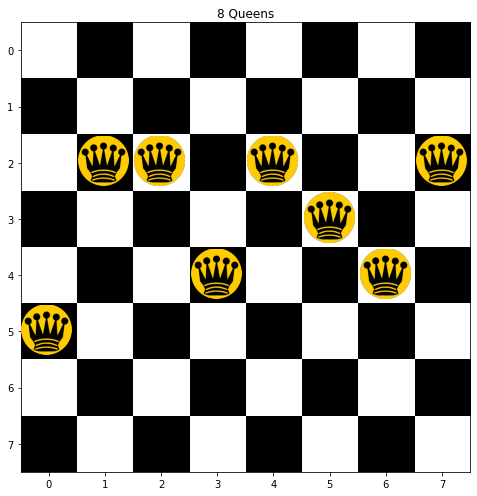

The Goal state is reached at 6
Final Conflicts = 0


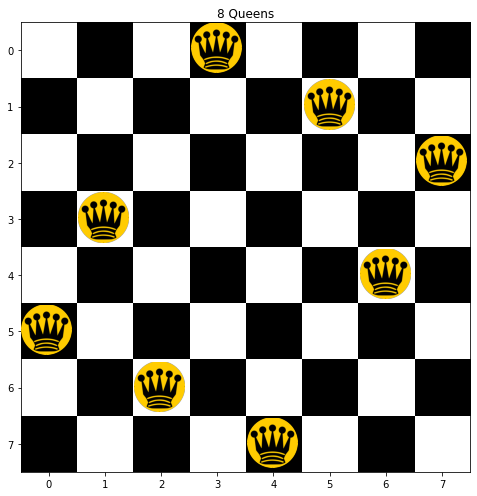

The total time required for 20000 iterations is 0.0220 seconds
Type 1:	N-value:8
Initial Conflicts = 20

The Goal state is reached at 61
(1, 4, 6, 0, 2, 7, 5, 3)
Final Conflicts = 0
The total time required for 20000 iterations is 0.2480 seconds


Type 2:	N-value:16
Initial Conflicts = 46

The Goal state is reached at 37
(8, 1, 12, 7, 2, 0, 11, 14, 10, 15, 13, 5, 3, 9, 6, 4)
Final Conflicts = 0
The total time required for 20000 iterations is 2.4642 seconds


Type 3:	N-value:32
Initial Conflicts = 78

The Goal state is reached at 48
(19, 2, 12, 17, 29, 20, 23, 25, 5, 22, 6, 27, 16, 13, 3, 0, 8, 4, 30, 26, 15, 9, 1, 14, 18, 24, 10, 7, 31, 11, 28, 21)
Final Conflicts = 0
The total time required for 20000 iterations is 52.0147 seconds


Type 4:	N-value:64
Initial Conflicts = 132

The Goal state is reached at 52
(14, 1, 30, 16, 57, 22, 37, 34, 45, 35, 52, 54, 27, 4, 17, 23, 2, 58, 51, 31, 10, 61, 24, 19, 48, 0, 42, 50, 60, 6, 28, 3, 15, 40, 53, 20, 12, 26, 63, 13, 49, 33, 36, 8, 62, 11, 39, 

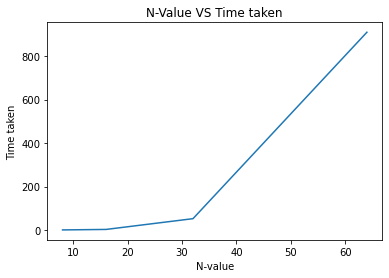

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations
from IPython.display import display
from ipynb.fs.full.notebook import plot_NQueens

class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        
        raise NotImplementedError
    def result(self, state, action): 
        raise NotImplementedError
    def is_goal(self, state):        
        return state == self.goal
    def action_cost(self, s, a, s1): 
        return 1
    
    def __str__(self):
        return '{0}({1}, {2})'.format(
            type(self).__name__, self.initial, self.goal)

class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __str__(self): 
        return '<{0}>'.format(self.state)
    def __len__(self): 
        return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): 
        return self.path_cost < other.path_cost


failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.

def expand(problem, state):
    return problem.actions(state)

class NQueensProblem(Problem):

    def __init__(self, N):
        super().__init__(initial=tuple(random.randint(0,N-1) for _ in tuple(range(N))))
        self.N = N

    def actions(self, state):
        """ finds the nearest neighbors"""
        neighbors = []
        for i in range(self.N):
            for j in range(self.N):
                if j == state[i]:
                    continue
                s1 = list(state)
                s1[i]=j
                new_state = tuple(s1)
                yield Node(state=new_state)

    def result(self, state, row):
        """Place the next queen at the given row."""
        col = state.index(-1)
        new = list(state[:])
        new[col] = row
        return tuple(new)

    def conflicted(self, state, row, col):
        """Would placing a queen at (row, col) conflict with anything?"""
        return any(self.conflict(row, col, state[c], c)
                   for c in range(col))

    def conflict(self, row1, col1, row2, col2):
        """Would putting two queens in (row1, col1) and (row2, col2) conflict?"""
        return (row1 == row2 or  # same row
                col1 == col2 or  # same column
                row1 - col1 == row2 - col2 or  # same \ diagonal
                row1 + col1 == row2 + col2)  # same / diagonal

    def goal_test(self, state):
        return not any(self.conflicted(state, state[col], col)
                       for col in range(len(state)))

    def h(self, node):
        """Return number of conflicting queens for a given node"""
        num_conflicts = 0
        for (r1,c1) in enumerate(node.state):
            for (r2,c2) in enumerate(node.state):
                if (r1,c1)!=(r2,c2):
                    num_conflicts += self.conflict(r1,c1,r2,c2) 
        return num_conflicts

def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    random.shuffle(items)
    return items

def argmin_random_tie(seq, key):
    """Return an element with highest fn(seq[i]) score; break ties at random."""
    return min(shuffled(seq), key=key)

def hill_climbing(problem,iterations = 10000):
    # as this is a stochastic algorithm, we will set a cap on the number of iterations        
    current = Node(problem.initial)
    i=1
    while i < iterations:
        neighbors = expand(problem,current.state)
        if not neighbors:
            break
        neighbour = argmin_random_tie(neighbors,key=lambda node:problem.h(node))
        if problem.h(neighbour)<=problem.h(current):
            current.state= neighbour.state
            if problem.goal_test(current.state)==True:
                print('The Goal state is reached at {0}'.format(i))
                return current 
                
        i += 1        
    return current    

nq1=NQueensProblem(8)
plot_NQueens(nq1.initial)
n1 = Node(state=nq1.initial)
num_conflicts = nq1.h(n1)
import time
start=time.time()
sol1=hill_climbing(nq1,iterations=20000)
end=time.time()
sol1.state
num_conflicts = nq1.h(sol1)
print("Final Conflicts = {0}".format(num_conflicts))
plot_NQueens(list(sol1.state))
print("The total time required for 20000 iterations is {0:.4f} seconds".format(end-start))


n_values=[2**x for x in range(3,7)]
time_taken=[]
num=1
for each_i in n_values:
    nq1=NQueensProblem(each_i)
    print("Type {0}:\tN-value:{1}".format(num,each_i))
    n1 = Node(state=nq1.initial)
    num_conflicts = nq1.h(n1)
    print("Initial Conflicts = {0}\n".format(num_conflicts))
    start=time.time()
    sol1=hill_climbing(nq1,iterations=100)
    end=time.time()
    print(sol1.state)
    num_conflicts = nq1.h(sol1)
    print("Final Conflicts = {0}".format(num_conflicts))
    print("The total time required for 20000 iterations is {0:.4f} seconds\n\n".format(end-start))
    time_taken.append(end-start)
    num+=1
    
plt.title("N-Value VS Time taken")
plt.xlabel("N-value")
plt.ylabel("Time taken")
plt.plot(n_values,time_taken)
plt.show()

In [10]:
Nq1=NQueensProblem(8)

In [4]:
print("Initial Conflicts = {0}".format(num_conflicts))

Initial Conflicts = 0


In [5]:
sol1=hill_climbing(nq1,iterations=20000)

The Goal state is reached at 73


In [6]:
sol1.state

(51,
 27,
 46,
 16,
 25,
 6,
 14,
 34,
 60,
 13,
 43,
 54,
 12,
 1,
 49,
 20,
 28,
 26,
 58,
 11,
 61,
 37,
 24,
 57,
 48,
 0,
 62,
 30,
 4,
 7,
 41,
 3,
 15,
 19,
 53,
 31,
 33,
 47,
 52,
 59,
 10,
 23,
 35,
 42,
 18,
 22,
 36,
 2,
 8,
 5,
 29,
 9,
 39,
 17,
 38,
 40,
 45,
 63,
 56,
 50,
 55,
 32,
 21,
 44)

In [7]:
num1_conflicts = nq1.h(sol1)

In [8]:
print("Final Conflicts = {0}".format(num_conflicts))

Final Conflicts = 0


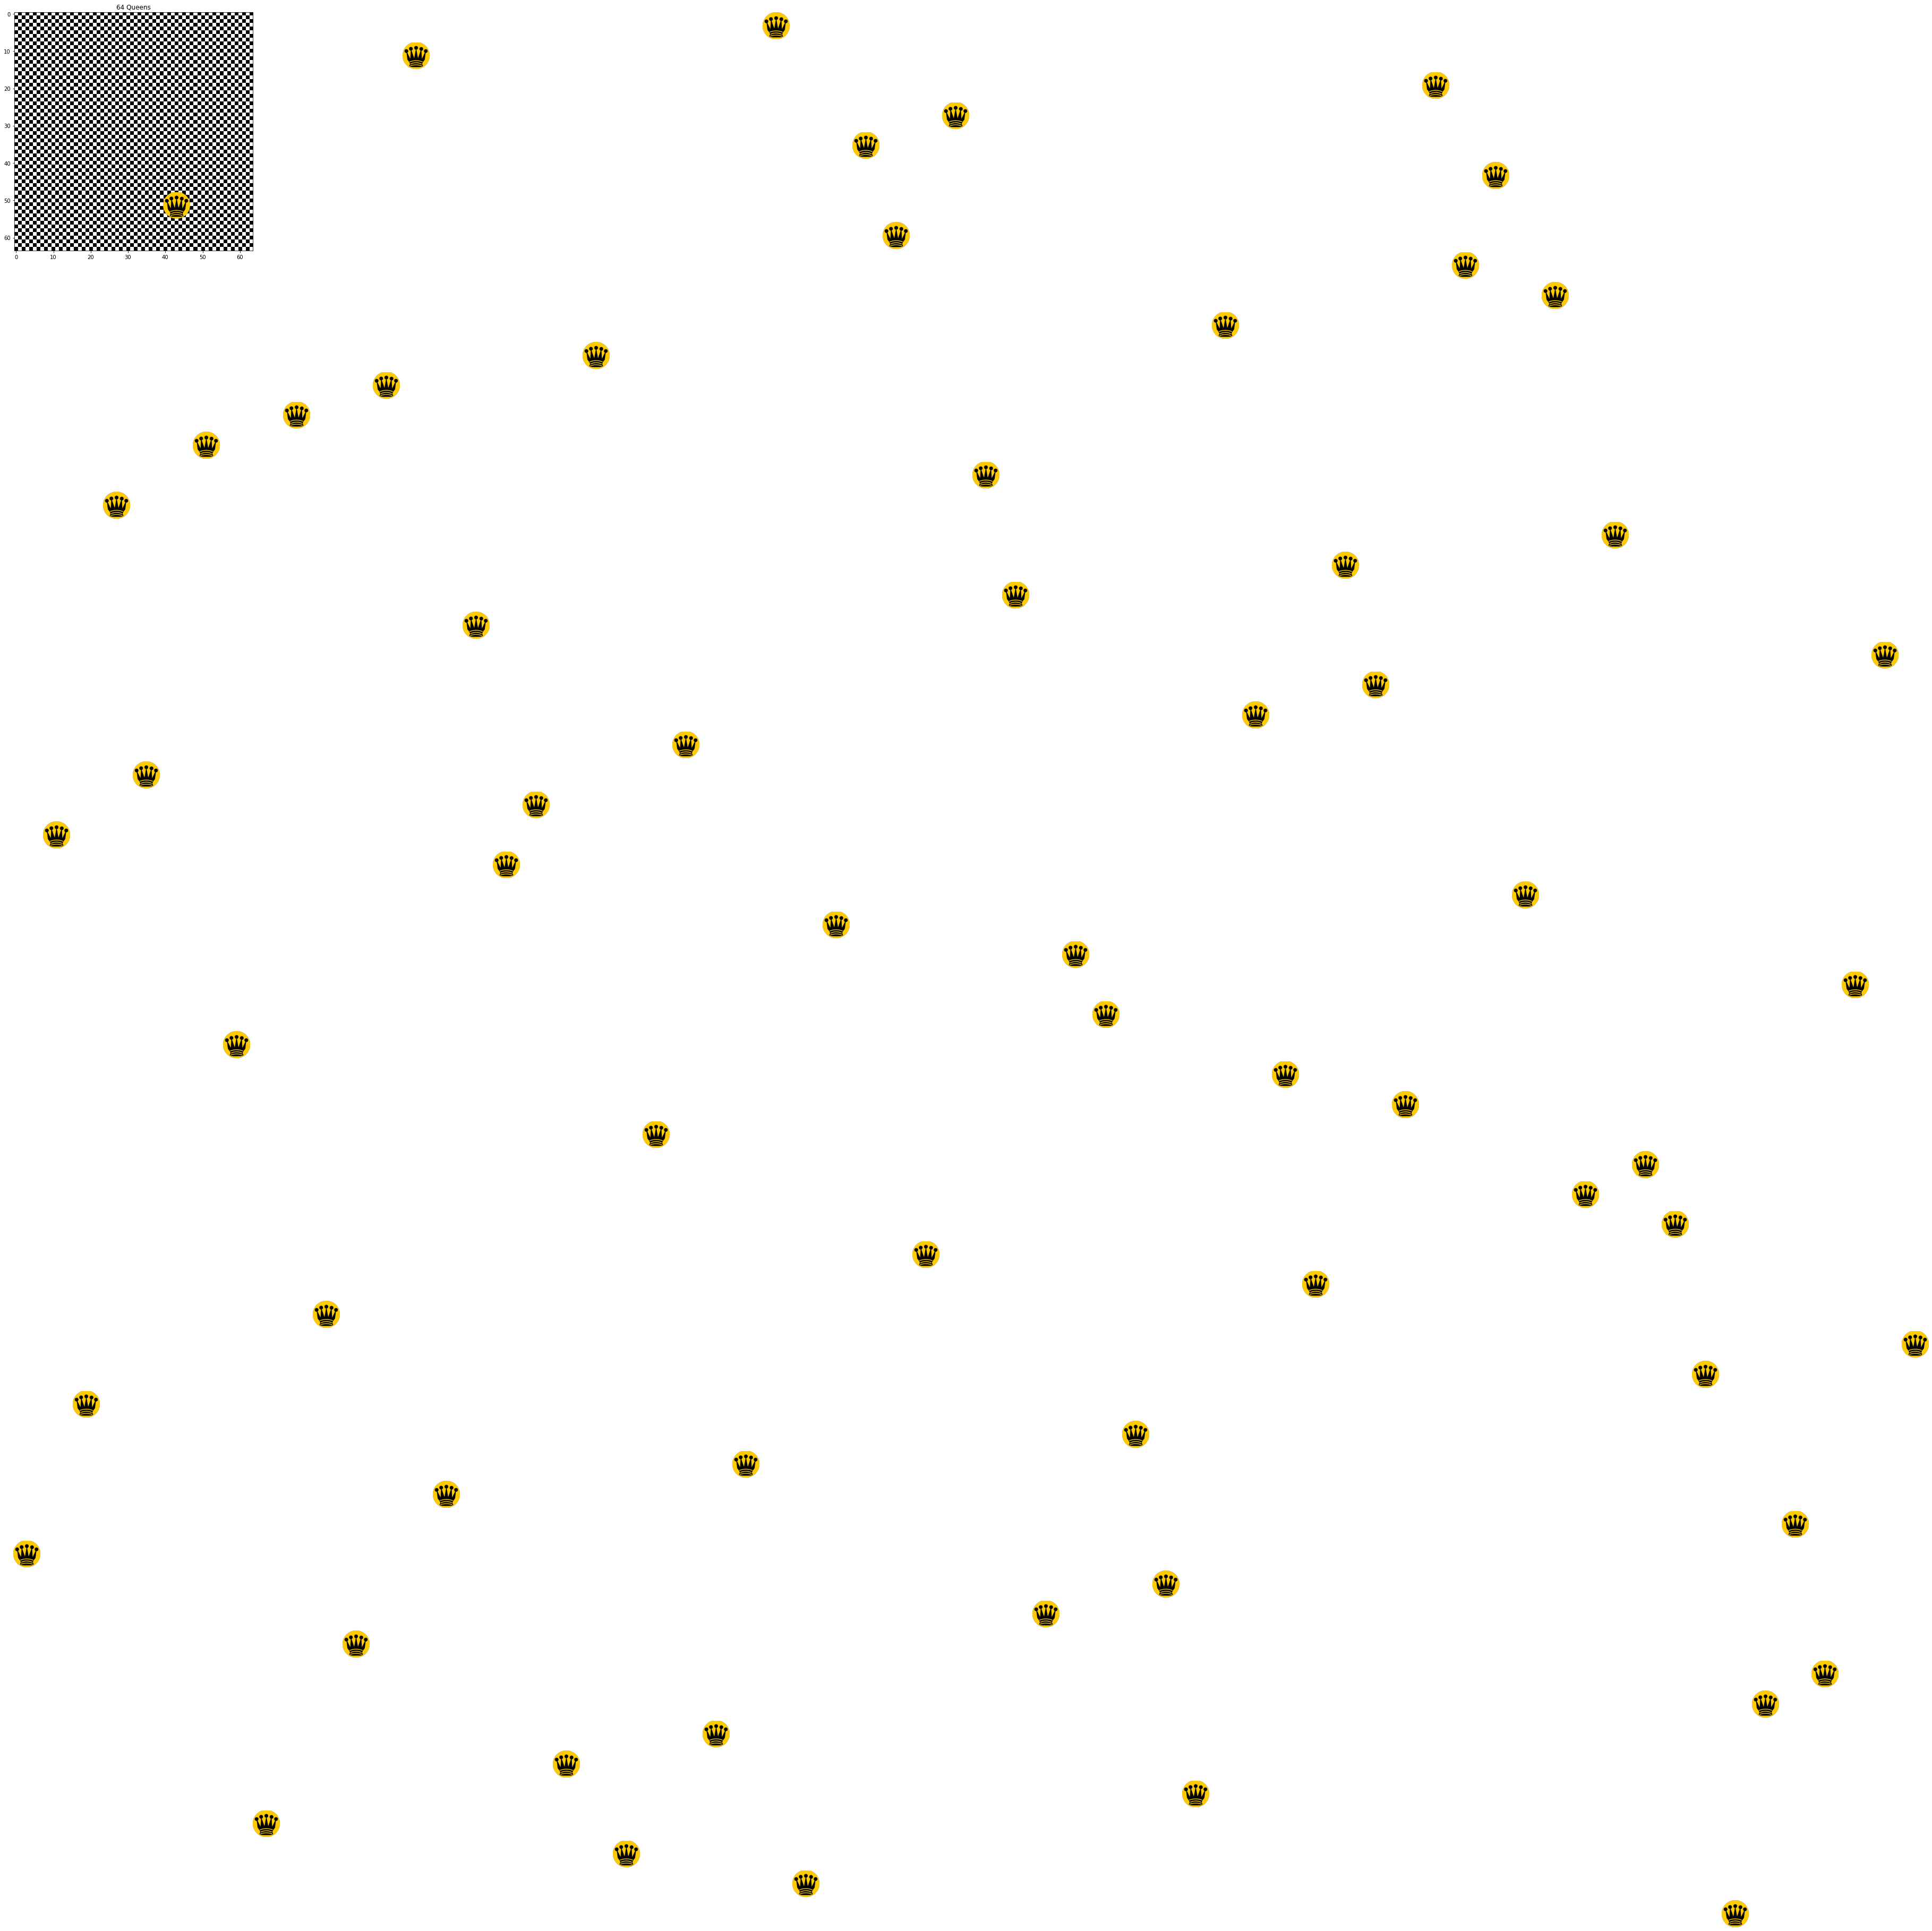

In [9]:
plot_NQueens(list(sol1.state))